In [2]:
#Loading the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense,Dropout,LSTM

In [3]:
#Load Data
company = 'FB'

In [4]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

data  = web.DataReader(company,'yahoo',start,end)

In [24]:
#Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

prediction_days = 60
x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):#60 - 1917 = 1857
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#Build the dataset
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))                                                           
model.add(Dropout(0.2))
model.add(Dense(units=1))#Prediction of the nest class

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)


#test the model accuracy on the existing data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data  = web.DataReader(company,'yahoo',test_start,test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']))

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values#1857-2395

model_inputs = model_inputs.reshape(-1,1)

model_inputs = scaler.transform(model_inputs)

#Make predictions on test data
x_test =[]

for x in range(prediction_days , len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
x_test = np.array(x_test)


x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)

predicted_prices = scaler.inverse_transform(predicted_prices)





Epoch 1/25
59/59 [==============================] - 6s 44ms/step - loss: 0.0267
Epoch 2/25
59/59 [==============================] - 3s 44ms/step - loss: 0.0039
Epoch 3/25
59/59 [==============================] - 2s 38ms/step - loss: 0.0041
Epoch 4/25
59/59 [==============================] - 2s 36ms/step - loss: 0.0037
Epoch 5/25
59/59 [==============================] - 2s 38ms/step - loss: 0.0033
Epoch 6/25
59/59 [==============================] - 2s 36ms/step - loss: 0.0032
Epoch 7/25
59/59 [==============================] - 2s 36ms/step - loss: 0.0034
Epoch 8/25
59/59 [==============================] - 2s 39ms/step - loss: 0.0030
Epoch 9/25
59/59 [==============================] - 2s 39ms/step - loss: 0.0027
Epoch 10/25
59/59 [==============================] - 2s 38ms/step - loss: 0.0028
Epoch 11/25
59/59 [==============================] - 3s 55ms/step - loss: 0.0028
Epoch 12/25
59/59 [==============================] - 4s 74ms/step - loss: 0.0027: 0s - loss: 0.002
Epoch 13/25
59/59 [

In [28]:
model_inputs.shape

(538, 1)

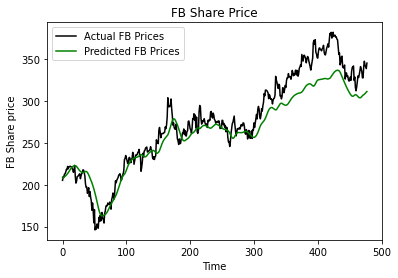

In [25]:
#Plot the test Predictions
plt.plot(actual_prices, color="black",label=f"Actual {company} Prices")
plt.plot(predicted_prices, color='green', label=f"Predicted {company} Prices")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share price')
plt.legend()
plt.show()

In [39]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs)+2- prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)

prediction = scaler.inverse_transform(prediction)

print("Prediction for the 60th day:",prediction)

Prediction: [[312.11682]]
